In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import time
import matplotlib.pyplot as plt

# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'TRAIN'
valid_path = 'TEST'

In [2]:
# add preprocessing layer to the front of VGG
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in inception.layers:
    layer.trainable = False 

87924736/87910968 [==============================] - 9s 0us/step


In [3]:
# useful for getting number of classes
folders = glob('TRAIN/*')

In [4]:
# our layers - you can add more if you want
x = Flatten()(inception.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)
# create a model object
model = Model(inputs=inception.input, outputs=prediction)
# view the structure of the model
#model.summary()

In [5]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [6]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(validation_split=0.2,
                                   rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('TRAIN',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('TEST',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1492 images belonging to 2 classes.
Found 374 images belonging to 2 classes.


In [8]:
'''r=model.fit_generator(training_set,
                         samples_per_epoch = 8000,
                         nb_epoch = 5,
                         validation_data = test_set,
                         nb_val_samples = 2000)'''

# fit the model
start = time.time() #tomamos medida del tiempo

r = model.fit(
  training_set,
  #validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)
end = time.time() #paramos el tiempo
hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)
print()
print()
print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))

TypeError: __array__() takes 1 positional argument but 2 were given

In [13]:
scores = model.evaluate(test_set, verbose=0)

In [24]:
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 93.32%


In [21]:
print(r.history.keys())

dict_keys(['loss', 'accuracy'])


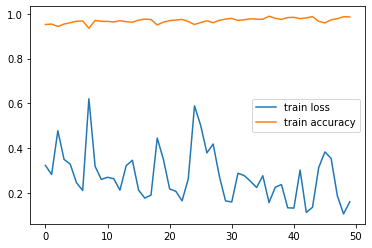

In [22]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['accuracy'], label='train accuracy')
plt.legend()
plt.show()
#plt.savefig('LossVal_loss_Inceptionv3_Solo_SISO')

In [ ]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
#plt.savefig('LossVal_loss_Inceptionv3_Solo_SISO')

In [ ]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
#plt.savefig('AccVal_acc_Inceptionv3_Solo_SISO')

In [ ]:
import tensorflow as tf

from keras.models import load_model

model.save('50epochs_Inceptionv3_Solo_SISO.h5')

In [ ]:
import pandas as pd
#save the history of our model
hist_df = pd.DataFrame(r.history) 
hist_csv_file = 'history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [ ]:
np.mean(r.history['accuracy'])